# Business Understanding

Since 2008, guests and hosts have used Airbnb to travel in a more unique, personalized way. Airbnb is available in 191+ countries, and our Community Standards help promote safety and belonging for everyone. 

This project aims to understand the market of apartament's and house's rent exploring data of airBnB rents in Seattle. In order to understand the behavior of the market and its characteristics 3 questions will be answered:

1) How much AirBNB homes are earning in certain time frames and areas?

2) Is increasing or decresing? and is it the price ou the days rented the reason for the variation?

3) Which are the most common amenitites?

The dataset for this project is:
- Listings, including full descriptions and average review score
- Calendar, including listing id and the price and availability for that day

The inspiration for this project is from https://www.kaggle.com/airbnb/seattle/data, but since the data was from 2016, data from 2021 was downloaded from http://insideairbnb.com/get-the-data.html.

Other fonts: https://www.airbnb.com/d/howairbnbworks

# Data Understanding

In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Import Seattle data
# listing id and the price and availability for that day
cal_seattle = pd.read_csv('data/calendar.csv')
# full descriptions and average review score
listings_seattle = pd.read_csv('data/listings.csv')

cal_seattle.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,2318,2021-01-24,t,$296.00,$296.00,7.0,1125.0
1,1171574,2021-01-24,f,$59.00,$59.00,5.0,30.0
2,1171574,2021-01-25,t,$59.00,$59.00,5.0,30.0
3,1171574,2021-01-26,t,$59.00,$59.00,4.0,60.0
4,1171574,2021-01-27,t,$59.00,$59.00,4.0,60.0


In order to understand the range of dates of the date we need to transform the datatype of the 'date' column.

In [125]:
# Converts 'date' column from string to datetime
date_col = pd.to_datetime(cal_seattle['date'])
first_day = date_col.min()
last_day =  date_col.max()

print('The dataset is from {} to {}. A total of {} days'.format(first_day,last_day,last_day-first_day))

The dataset is from 2021-01-23 00:00:00 to 2022-01-25 00:00:00. A total of 367 days 00:00:00 days


Below we are checking possible duplicates and also nan values. Since we are not going to use columns minimum_nights and maximum_nights, it won't be necessary dropping rows with Nan values.

In [126]:
# Variables with number of rows with complete dataframe and after apply function to remove duplicates
def find_duplicates(data):
    len_complete = len(data)
    len_no_duplicates = len(data.drop_duplicates())

    if (len_complete==len_no_duplicates):
        print('No duplicates were identified')
    else:
        print('{} rows are duplicated'.format(len_complete-len_no_duplicates))
        
def find_nan(data,columns_check):
    for col in columns_check:
        print('{} nan values were found in {} column'.format(len(data[col][data[col].isnull()]),col))
        
find_duplicates(cal_seattle)

check_columns = cal_seattle.columns
find_nan(cal_seattle,check_columns)

No duplicates were identified
0 nan values were found in listing_id column
0 nan values were found in date column
0 nan values were found in available column
0 nan values were found in price column
0 nan values were found in adjusted_price column
49 nan values were found in minimum_nights column
49 nan values were found in maximum_nights column


In [127]:
listings_seattle.head(3)

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2318,https://www.airbnb.com/rooms/2318,20210123171555,2021-01-24,Casa Madrona - Urban Oasis 1 block from the park!,"Gorgeous, architect remodeled, Dutch Colonial ...",Madrona is a hidden gem of a neighborhood. It ...,https://a0.muscache.com/pictures/02973ad3-a7a3...,2536,https://www.airbnb.com/users/show/2536,...,10.0,10.0,10.0,STR-OPLI-19-002837,f,1,1,0,0,0.21
1,9419,https://www.airbnb.com/rooms/9419,20210123171555,2021-01-24,Glorious sun room w/ memory foambed,"Keeping you safe is our priority, we are adher...","Lots of restaurants (see our guide book) bars,...",https://a0.muscache.com/pictures/56645186/e5fb...,30559,https://www.airbnb.com/users/show/30559,...,10.0,10.0,10.0,str-opli-19-003039,f,7,0,7,0,1.16
2,9531,https://www.airbnb.com/rooms/9531,20210123171555,2021-01-23,The Adorable Sweet Orange Craftsman,The Sweet Orange is a delightful and spacious ...,The neighborhood is awesome! Just far enough ...,https://a0.muscache.com/pictures/30470355/052c...,31481,https://www.airbnb.com/users/show/31481,...,10.0,10.0,10.0,STR-OPLI-19-002182,f,2,2,0,0,0.37


Let's check the columns and the listings_seattle dataframe about the duplicates and nan values

In [128]:
print(listings_seattle.columns)

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_upd

In [129]:
find_duplicates(listings_seattle)

check_columns = ['id','price','neighbourhood_cleansed','amenities']
find_nan(listings_seattle,check_columns)

No duplicates were identified
0 nan values were found in id column
0 nan values were found in price column
0 nan values were found in neighbourhood_cleansed column
0 nan values were found in amenities column


# Data Preparation

In order to answer the questions and after checking both dataset, the following preprocess is necessary:

In [130]:
#Changing calendar from string to float
cal_seattle_copy = cal_seattle.copy()
cal_seattle_copy[['date']] = pd.to_datetime(cal_seattle_copy['date'])

#Split date into month and year
cal_seattle_copy['month'] = cal_seattle_copy['date'].apply(lambda x: x.month)
cal_seattle_copy['year'] = cal_seattle_copy['date'].apply(lambda x: x.year)

#Changing price from string to float
cal_seattle_copy[['price']] = cal_seattle_copy['price'].str.replace('$','')
cal_seattle_copy[['price']] = cal_seattle_copy['price'].str.replace(',','')
cal_seattle_copy[['price']] = cal_seattle_copy['price'].astype('float')
cal_seattle_copy.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights,month,year
0,2318,2021-01-24,t,296.0,$296.00,7.0,1125.0,1,2021
1,1171574,2021-01-24,f,59.0,$59.00,5.0,30.0,1,2021
2,1171574,2021-01-25,t,59.0,$59.00,5.0,30.0,1,2021
3,1171574,2021-01-26,t,59.0,$59.00,4.0,60.0,1,2021
4,1171574,2021-01-27,t,59.0,$59.00,4.0,60.0,1,2021


In [131]:
#Find earnigs per month based on the mean price and not available days of the month for each listing_id 
count_no_available = cal_seattle_copy[cal_seattle_copy['available']=='f'].groupby(['listing_id','year','month']).agg({'date':'count'}).fillna(0)
mean_price_month = cal_seattle_copy[cal_seattle_copy['available']=='t'].groupby(['listing_id','year','month']).agg({'price':'mean'}).fillna(0)
mean_price_year = cal_seattle_copy[cal_seattle_copy['available']=='t'].groupby(['listing_id']).agg({'price':'mean'}).fillna(0)

days_price = count_no_available.merge(mean_price_month,left_on=['listing_id','year','month'],right_index=True)
days_price = days_price.merge(mean_price_year,left_on=['listing_id'],right_index=True)
days_price = days_price.rename(columns={'date':'days_not_available','price_x':'price_month','price_y':'price_year'})

days_price['earnings'] = days_price['days_not_available']*days_price['price_month']
days_price = days_price.reset_index()
days_price.head()

,listing_id,year,month,days_not_available,price_month,price_year,earnings
0,9419,2021,1,7,55.0,55.000000,385.0
1,9419,2021,3,30,55.0,55.000000,1650.0
2,9531,2021,2,27,155.0,164.969605,4185.0
3,9534,2021,2,9,125.0,125.000000,1125.0
4,9534,2021,3,21,125.0,125.000000,2625.0


## 1) How much AirBNB homes are earning in certain time frames and areas?

From the chart below we can suggest that the second semester has the biggest earnings/rent for airBnB in Seattle between the most popular neighbourhoods in number of rents. The only neighbourhood which we can suggest a fall in earnings is the north beacon Hill.

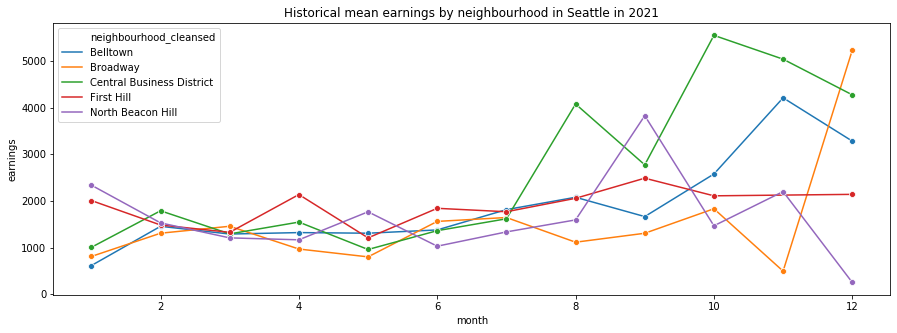

In [132]:
#Merge the historical price with the information of each listing_seattle
days_price_info = days_price.merge(listings_seattle,left_on='listing_id',right_on='id')
#Neighbourhoods with less days of availability in days in a year
neighbourhood_less_avail = days_price_info.groupby(['neighbourhood_cleansed'])[['days_not_available']].sum().sort_values('days_not_available',ascending=False).reset_index()
neighbourhood_less_avail = neighbourhood_less_avail.head(5)['neighbourhood_cleansed']

neighbourhood_earnings = days_price_info[['listing_id','month','earnings','neighbourhood_cleansed']].groupby(['month','neighbourhood_cleansed'])[['earnings']].mean().reset_index()
neighbourhood_earnings = neighbourhood_earnings.loc[neighbourhood_earnings['neighbourhood_cleansed'].isin(neighbourhood_less_avail)]

#plot the mean earnings of the 5 neighbourhoods with less availability in days in a year
f,ax = plt.subplots(1,1,figsize=(15,5))
ax.set_title('Historical mean earnings by neighbourhood in Seattle in 2021')
sns.lineplot(x='month',y='earnings',hue='neighbourhood_cleansed',marker='o',data=neighbourhood_earnings,ax=ax)
plt.show()

## 2) Earnings are increasing or decreasing? and is the price ou the days rented the reason for the variation?

Let's try to understand why Central Business District grew up so much its earnings, was this because of the price ou due to number of days rent? price increases 66% until comparing december and january, but the number of days not available increase even more, with a 162% increase. So both variable impact posively the earnings but the number of days not available impacts more.

In [133]:
central_business_district = days_price_info[days_price_info['neighbourhood_cleansed']=='Central Business District']
central_business_district = central_business_district[['month','price_month','days_not_available']].groupby('month').mean()

price_jan = central_business_district.iloc[0][0]
days_not_avai_jan = central_business_district.iloc[0][1]

central_business_district['% to jan price'] = central_business_district['price_month']/price_jan*100
central_business_district['% to jan days not avail.'] = central_business_district['days_not_available']/days_not_avai_jan*100
central_business_district

,price_month,days_not_available,% to jan price,% to jan days not avail.
month,,,,
1,142.426180,6.548077,100.000000,100.000000
2,125.218938,15.064935,87.918483,230.066556
3,162.187828,8.557377,113.875010,130.685347
4,189.118729,7.730159,132.783684,118.052351
5,198.060407,5.525000,139.061798,84.375918
6,190.302515,8.310345,133.614841,126.912755
7,207.271841,8.105263,145.529312,123.780818
8,288.319182,14.538462,202.434118,222.026432
9,269.077756,9.500000,188.924364,145.080764


## 3) Which are the most common amenities?

To answer this question we need to preprocess the amenities column because the value is a string. We need follow the steps:

1) Remove unnacessary punctuation or blank spaces and pass all words as upper or lowcase.

2) Split values in words and transform in lists

3) Find unique values of amenities

4) Create columns of each amenity

5) Fill each column with 1 if apartament has amenity and 0 if it has not

In [134]:
#Find the amenities unique values
listings_amenities = listings_seattle.copy()
listings_amenities['amenities'] = listings_amenities['amenities'].apply(lambda x: x.upper()
                                                     .replace('{','').replace('}','')
                                                     .replace('"','').replace('[','')
                                                     .replace(']','').split(','))

main_columns = ['amenities','id']
listings_amenities = listings_amenities[main_columns]

In [135]:
# Get all unique amenities
list_amenities = []
for am in listings_amenities['amenities']:
    for a in am:
        list_amenities.append(a.strip())

list_amenities = pd.Series(list_amenities).unique()

# Add a column for all unique amenities
for i in list_amenities:
    listings_amenities[i]=0
    
# Add 1 if the amenitie is present
for ame,amenitie in enumerate(listings_amenities['amenities']):
    for a in amenitie:
        for c,column in enumerate(listings_amenities.columns):
            if (a.strip()==column):
                listings_amenities.iloc[ame,c]=1
                
listings_amenities = listings_amenities.drop('amenities',axis=1)     

listings_amenities.head()

,id,COOKING BASICS,CHILDREN\U2019S BOOKS AND TOYS,STOVE,GARDEN OR BACKYARD,FREE PARKING ON PREMISES,LONG TERM STAYS ALLOWED,DISHWASHER,REFRIGERATOR,MICROWAVE,...,BOSE SOUND SYSTEM WITH AUX,DEDICATED WORKSPACE: OFFICE CHAIR,TABLE,AND DESK,AVEDA CONDITIONER CONDITIONER,FISHER & PAYKEL REFRIGERATOR,43\ HDTV WITH NETFLIX,AVEDA SHAMPOO SHAMPOO,PURACY - PLANT BASED BODY WASH BODY SOAP,SAMSUNG SOUNDBAR BLUETOOTH SOUND SYSTEM
0,2318,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,9419,1,0,1,0,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,9531,1,0,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,9534,1,0,1,1,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
4,9596,1,0,1,1,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


After processing the table we can now sum all values from each amenity column and calculate the relation between the total number of unique apartaments. The table below show us that the 5 most common facilities are: WIFI, SMOKE ALARMS, ESSENTIALS, HEATING, HAIR DRYER.

In [136]:
# Find the most representative amenities
cols = listings_amenities.columns
main_amenities = pd.DataFrame(listings_amenities.drop(['id'],axis=1).sum(),columns=['quantity'])
main_amenities = main_amenities.sort_values('quantity',ascending=False)
main_amenities['% apartaments'] = main_amenities['quantity']/len(listings_amenities)*100
main_amenities['% apartaments'] = main_amenities['% apartaments'].round(1)
main_amenities = main_amenities.head(10)
main_amenities

,quantity,% apartaments
WIFI,4239,98.4
SMOKE ALARM,4221,97.9
ESSENTIALS,4085,94.8
HEATING,4028,93.5
HAIR DRYER,3924,91.0
HANGERS,3864,89.7
SHAMPOO,3820,88.6
CARBON MONOXIDE ALARM,3819,88.6
LONG TERM STAYS ALLOWED,3819,88.6
KITCHEN,3789,87.9


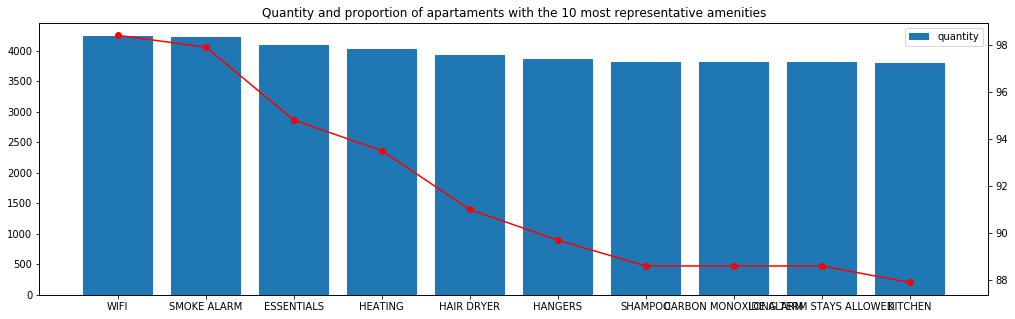

In [137]:
fig, ax1 = plt.subplots(figsize=(17,5))
ax1.bar(main_amenities.index,main_amenities['quantity'],label='quantity')

ax2 = ax1.twinx()
ax2.plot(main_amenities.index,main_amenities['% apartaments'],color='red',marker='o',label='% apartaments')
ax1.set_title('Quantity and proportion of apartaments with the 10 most representative amenities')
ax1.legend()

plt.show()